In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import  LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import pickle
import json

import warnings
warnings.filterwarnings('ignore')

import config

### problem statement

In [ ]:
predict if person having diabeties or not by using following features:
 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'.  

### Data Gathering

In [3]:
df=pd.read_csv(r"G:\Python\workplace\diabetes\CSV_FILE\diabetes.csv")
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


### EDA

### checking missing value

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [5]:
df.isna().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# no missing value present

### checking for outliers

<AxesSubplot: xlabel='Glucose'>

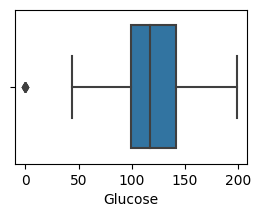

In [5]:
plt.figure(figsize=(3,2))
sns.boxplot(x=df["Glucose"])

In [6]:
q1,q3=np.quantile(df["Glucose"],[0.25,0.75])
iqr=q3-q1
lower_tail=q1-1.5*iqr
df["Glucose"]=np.where(df["Glucose"] < lower_tail,lower_tail,df["Glucose"])


<AxesSubplot: xlabel='Glucose'>

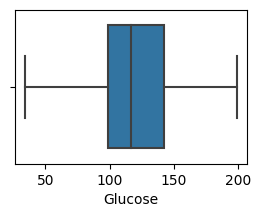

In [7]:
plt.figure(figsize=(3,2))
sns.boxplot(x=df["Glucose"])

<AxesSubplot: xlabel='BloodPressure'>

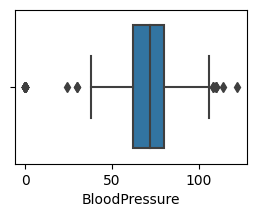

In [8]:
plt.figure(figsize=(3,2))
sns.boxplot(x=df["BloodPressure"])

In [9]:
q1,q3=np.quantile(df["BloodPressure"],[0.25,0.75])
iqr=q3-q1
lower_tail=q1-1.5*iqr
df["BloodPressure"]=np.where(df["BloodPressure"] < lower_tail,lower_tail,df["BloodPressure"])


In [10]:
q1,q3=np.quantile(df["BloodPressure"],[0.25,0.75])
iqr=q3-q1
upper_tail=q3 + 1.5*iqr
df["BloodPressure"]=np.where(df["BloodPressure"] >upper_tail,upper_tail,df["BloodPressure"])

<AxesSubplot: xlabel='BloodPressure'>

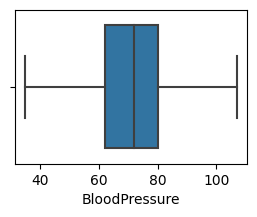

In [11]:
plt.figure(figsize=(3,2))
sns.boxplot(x=df["BloodPressure"])

<AxesSubplot: xlabel='SkinThickness'>

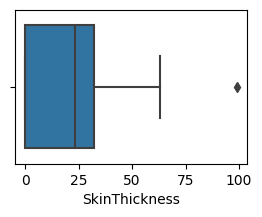

In [12]:
plt.figure(figsize=(3,2))
sns.boxplot(x=df["SkinThickness"])

In [13]:
q1,q3=np.quantile(df["SkinThickness"],[0.25,0.75])
iqr=q3-q1
upper_tail=q3 + 1.5*iqr
df["SkinThickness"]=np.where(df["SkinThickness"] > upper_tail,upper_tail,df["SkinThickness"])


<AxesSubplot: xlabel='SkinThickness'>

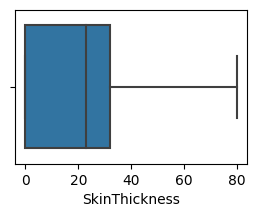

In [14]:
plt.figure(figsize=(3,2))
sns.boxplot(x=df["SkinThickness"])

<AxesSubplot: xlabel='Insulin'>

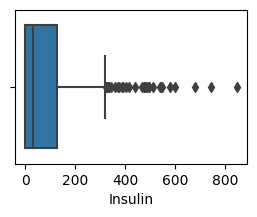

In [15]:
plt.figure(figsize=(3,2))
sns.boxplot(x=df["Insulin"])

In [16]:
q1,q3=np.quantile(df["Insulin"],[0.25,0.75])
iqr=q3-q1
upper_tail=q3 + 1.5*iqr
df["Insulin"]=np.where(df["Insulin"] > upper_tail,upper_tail,df["Insulin"])


<AxesSubplot: xlabel='Insulin'>

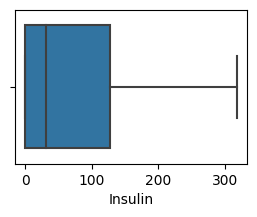

In [17]:
plt.figure(figsize=(3,2))
sns.boxplot(x=df["Insulin"])

<AxesSubplot: xlabel='BMI'>

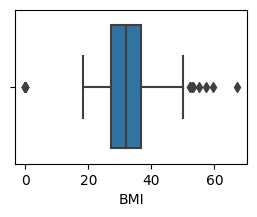

In [18]:
plt.figure(figsize=(3,2))
sns.boxplot(x=df["BMI"])

In [19]:
q1,q3=np.quantile(df["BMI"],[0.25,0.75])
iqr=q3-q1
upper_tail=q3 + 1.5*iqr
lower_tail=q1-1.5*iqr
df["BMI"]=np.where(df["BMI"] < lower_tail,lower_tail,df["BMI"])
df["BMI"]=np.where(df["BMI"] > upper_tail,upper_tail,df["BMI"])


<AxesSubplot: xlabel='BMI'>

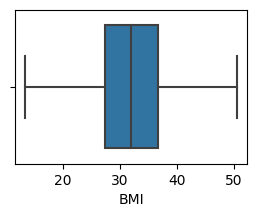

In [20]:
plt.figure(figsize=(3,2))
sns.boxplot(x=df["BMI"])

<AxesSubplot: xlabel='DiabetesPedigreeFunction'>

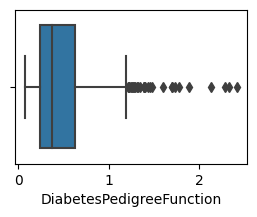

In [21]:
plt.figure(figsize=(3,2))
sns.boxplot(x=df["DiabetesPedigreeFunction"])

In [22]:
q1,q3=np.quantile(df["DiabetesPedigreeFunction"],[0.25,0.75])
iqr=q3-q1
upper_tail=q3 + 1.5*iqr
df["DiabetesPedigreeFunction"]=np.where(df["DiabetesPedigreeFunction"] > upper_tail,upper_tail,df["DiabetesPedigreeFunction"])


<AxesSubplot: xlabel='DiabetesPedigreeFunction'>

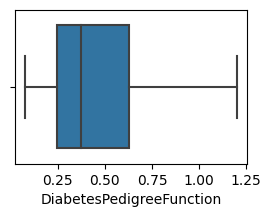

In [24]:
plt.figure(figsize=(3,2))
sns.boxplot(x=df["DiabetesPedigreeFunction"])

<AxesSubplot: xlabel='Age'>

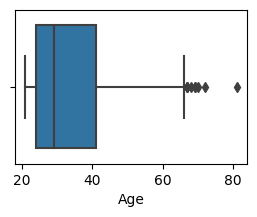

In [23]:
plt.figure(figsize=(3,2))
sns.boxplot(x=df["Age"])

In [25]:
q1,q3=np.quantile(df["Age"],[0.25,0.75])
iqr=q3-q1
upper_tail=q3 + 1.5*iqr
df["Age"]=np.where(df["Age"] > upper_tail,upper_tail,df["Age"])


<AxesSubplot: xlabel='Age'>

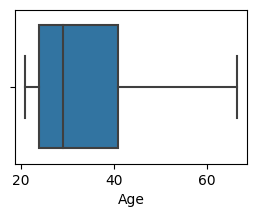

In [26]:
plt.figure(figsize=(3,2))
sns.boxplot(x=df["Age"])

In [27]:
x=df.drop(["Outcome"],axis=1)
x
y=df["Outcome"]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22,stratify=y)

In [29]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [30]:
acc_train=log_reg.score(x_train,y_train)
acc_train

0.7671009771986971

In [31]:
acc_test=log_reg.score(x_test,y_test)
acc_test

0.7857142857142857

In [32]:
kn_cl=KNeighborsClassifier()
kn_cl.fit(x_train,y_train)

KNeighborsClassifier()

In [71]:
kn_acc_train=kn_cl.score(x_train,y_train)
kn_acc_train

0.8175895765472313

In [72]:
kn_acc_test=kn_cl.score(x_test,y_test)
kn_acc_test

0.7532467532467533

### Hyperparameter Tunning for KNN

In [ ]:
kn_cl = KNeighborsClassifier(n_neighbors=5, p = 2)

param_grid = {'n_neighbors' : np.arange(3,21), 
             'p' : [1,2]}

gscv = GridSearchCV(kn_cl, param_grid, cv = 7)
gscv.fit(x_train, y_train)

In [75]:
gscv.best_estimator_

KNeighborsClassifier(n_neighbors=15, p=1)

In [76]:
knn_reg_gs = gscv.best_estimator_
knn_reg_gs.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=15, p=1)

In [77]:
train_score = knn_reg_gs.score(x_train, y_train)
print("Training Data Accuracy : ", train_score)

test_score = knn_reg_gs.score(x_test, y_test)
print("Testing Data Accuracy : ", test_score) 

Training Data Accuracy :  0.7817589576547231
Testing Data Accuracy :  0.7857142857142857


### save model

In [82]:
with open(r"Artifacts/kngs.pkl","wb") as f:
    pickle.dump(knn_reg_gs,f)    

In [83]:
df.head(1).T

,0
Glucose,148.000
BloodPressure,50.000
SkinThickness,35.000
Insulin,0.000
BMI,33.600
DiabetesPedigreeFunction,0.627
Age,50.000
Outcome,1.000
